# CAPM and the Security Market Line (SML)

The **Capital Asset Pricing Model (CAPM)** expresses the expected return of an asset as a linear function of its **systematic risk (beta)**:

$$
E(r_i) = r_f + \beta_i \left(E(r_m) - r_f\right)
$$

Where:  
- $E(r_i)$ = expected return of asset $i$  
- $r_f$ = risk-free rate  
- $E(r_m)$ = expected return of the market portfolio  
- $\beta_i$ = systematic risk of asset $i$  
- $E(r_m) - r_f$ = market risk premium  

---

## Beta Definition

Beta measures how sensitive an asset’s return is to the market:

$$
\beta_i = \frac{\text{Cov}(r_i, r_m)}{\text{Var}(r_m)}
$$

Where:  
- $\text{Cov}(r_i, r_m)$ = covariance between asset $i$ and the market  
- $\text{Var}(r_m)$ = variance of the market return  

---

## Derivation of the Security Market Line

Substitute $\beta_i$ into the CAPM equation:

$$
E(r_i) = r_f + \frac{\text{Cov}(r_i, r_m)}{\text{Var}(r_m)} \cdot (E(r_m) - r_f)
$$

This shows that the **expected return** depends linearly on beta.

---

## Security Market Line (SML)

The SML is the graphical representation of CAPM:

- **x-axis:** $\beta_i$ (systematic risk)  
- **y-axis:** $E(r_i)$ (expected return)

Equation of the SML:

$$
E(r) = r_f + \beta \cdot (E(r_m) - r_f)
$$

- Intercept = $r_f$  
- Slope = market risk premium $E(r_m) - r_f$  

**Interpretation:**  
- Assets above the SML → **undervalued** (higher expected return than CAPM predicts)  
- Assets below the SML → **overvalued**


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

tickers = [
    'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'FB', 'TSLA', 'NVDA', 'JPM', 'BAC', 'WFC',
    'V', 'MA', 'DIS', 'NFLX', 'HD', 'KO', 'PFE', 'MRK', 'INTC', 'CSCO',
    'ORCL', 'CRM', 'ABT', 'NKE', 'UNH', 'MDT', 'T', 'VZ', 'CVX', 'XOM',
    'BA', 'CAT', 'MMM', 'HON', 'GE', 'IBM', 'AMGN', 'GILD', 'QCOM', 'TXN',
    'PYPL', 'ADBE', 'SBUX', 'LLY', 'MO', 'PM', 'WMT', 'COST', 'MCD', 'BKNG',
    'C', 'SPG', 'O', 'DUK', 'SO', 'AEP', 'PPL', 'NEE', 'ETR', 'EXC',
    'UPS', 'FDX', 'GM', 'F', 'ROKU', 'SHOP', 'ZM', 'SNAP',
    'BABA', 'BIDU', 'JD', 'TCEHY', 'RBLX', 'DOCU', 'NET', 'SNOW', 'PLTR', 'ROK',
    'DE', 'LMT', 'RTX', 'NOC', 'GS', 'MS', 'BLK', 'SCHW', 'TGT', 'LOW',
    'CVS', 'WBA', 'CL', 'KMB', 'PG', 'MDT', 'SYY', 'ADM', 'EL', 'PEP',
    'SPY', 'QQQ', 'DIA', 'IWM', 'VTI', 'GLD', 'SLV', 'TLT', 'HYG', 'EEM',
    'XLF', 'XLY', 'XLE', 'XLI', 'XLV', 'XLC', 'XLK', 'XLB', 'XLRE', 'XLU'
]

market_index = '^GSPC'

start_date = '2023-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(tickers + [market_index], start=start_date, end=end_date)['Close']


C:\Users\marce\AppData\Local\Temp\ipykernel_3016\2990297214.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers + [market_index], start=start_date, end=end_date)['Close']
[*********************100%***********************]  118 of 118 completed


In [6]:

returns = data.pct_change().dropna()
market_returns = returns[market_index]

def calculate_beta(stock_returns, market_returns):
    covariance = np.cov(stock_returns, market_returns)[0, 1]
    variance = np.var(market_returns)
    beta = covariance / variance
    return beta

rf = 0.03  # 3%

rm = market_returns.mean() * 252

betas = {}
expected_returns = {}
for ticker in tickers:
    betas[ticker] = calculate_beta(returns[ticker], market_returns)
    expected_returns[ticker] = returns[ticker].mean() * 252  # Annualized

df = pd.DataFrame({
    'Ticker': tickers,
    'Beta': [betas[t] for t in tickers],
    'Expected_Return': [expected_returns[t] for t in tickers]
})

df


C:\Users\marce\AppData\Local\Temp\ipykernel_3016\144098045.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


,Ticker,Beta,Expected_Return
0,AAPL,1.460154,0.960876
1,MSFT,0.831342,0.122444
2,AMZN,1.651095,0.099832
3,GOOGL,1.406712,1.479827
4,FB,0.311919,0.138564
...,...,...,...
113,XLC,0.913595,0.421383
114,XLK,1.320684,0.436413
115,XLB,0.785103,0.086311
116,XLRE,0.373389,0.098431


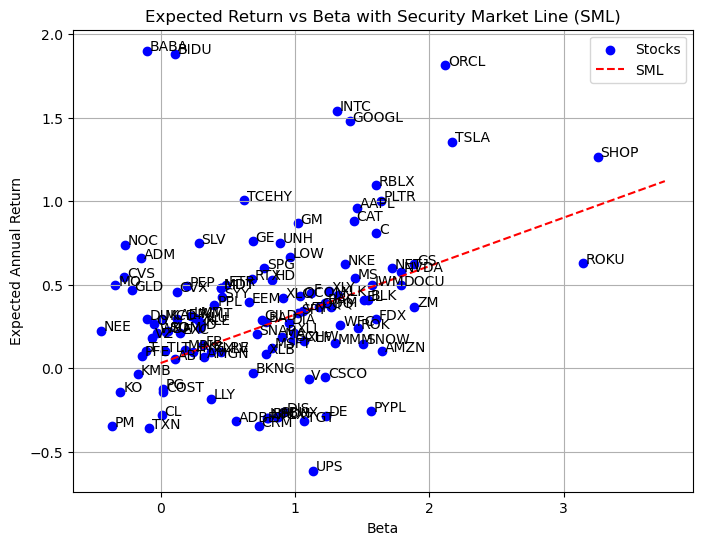

In [7]:

plt.figure(figsize=(8,6))
plt.scatter(df['Beta'], df['Expected_Return'], color='blue', label='Stocks')

beta_range = np.linspace(0, max(df['Beta']) + 0.5, 100)
sml = rf + beta_range * (rm - rf)
plt.plot(beta_range, sml, color='red', linestyle='--', label='SML')

for i, row in df.iterrows():
    plt.text(row['Beta']+0.02, row['Expected_Return'], row['Ticker'])

plt.xlabel('Beta')
plt.ylabel('Expected Annual Return')
plt.title('Expected Return vs Beta with Security Market Line (SML)')
plt.legend()
plt.grid(True)
plt.show()


Ejercicio:

Ajusta una regresion lineal a los puntos y compara la recta con la SML, interpreta lo que creas que significan los resultados de esta comparacion. (si lo consideras adecuado puedes usar algun tipo de regresion con regularizacion)

b0 (fijo): 0.0804
b1 (estimado): 0.2767

Primeras predicciones:
  Ticker      Beta  Expected_Return  Predicted_Return
0   AAPL  1.460154         0.960876          0.484493
1   MSFT  0.831342         0.122444          0.310471
2   AMZN  1.651095         0.099832          0.537335
3  GOOGL  1.406712         1.479827          0.469703
4     FB  0.311919         0.138564          0.166722


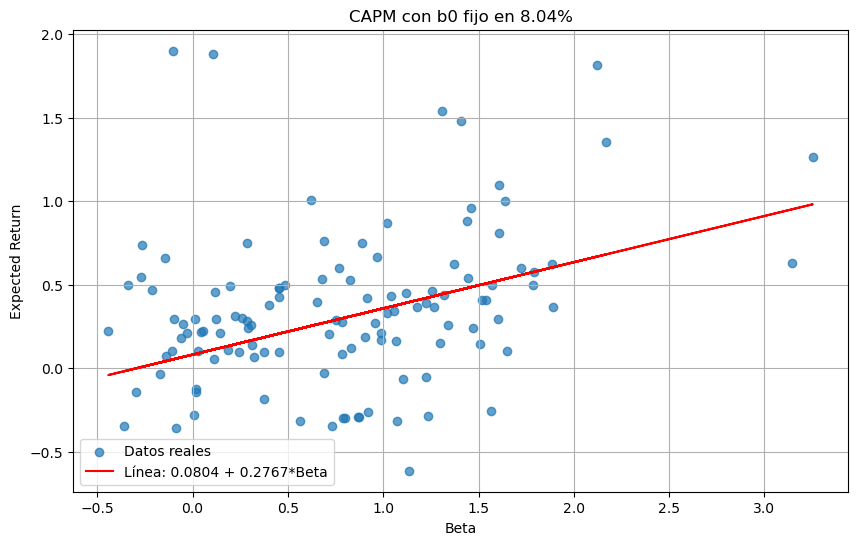

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Asegurarse de que los datos están cargados

# Definir b0 fijo
b0_fijo = 0.0804

# Variables
X = df[['Beta']].values  # matriz 2D para sklearn
y = df['Expected_Return'].values

# Ajustar una regresión sin intercepto, pero desplazando y
y_ajustado = y - b0_fijo

# Crear modelo sin intercepto
modelo = LinearRegression(fit_intercept=False)
modelo.fit(X, y_ajustado)

b1 = modelo.coef_[0]

print(f"b0 (fijo): {b0_fijo:.4f}")
print(f"b1 (estimado): {b1:.4f}")

# Predicciones
df['Predicted_Return'] = b0_fijo + b1 * df['Beta']

# Mostrar resultados
print("\nPrimeras predicciones:")
print(df[['Ticker', 'Beta', 'Expected_Return', 'Predicted_Return']].head())

# Gráfico opcional
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Beta'], df['Expected_Return'], alpha=0.7, label='Datos reales')
plt.plot(df['Beta'], df['Predicted_Return'], color='red', label=f'Línea: 0.0804 + {b1:.4f}*Beta')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.legend()
plt.title('CAPM con b0 fijo en 8.04%')
plt.grid(True)
plt.show()